###RNN s

* https://www.youtube.com/watch?v=D6vxZ5KMD18

**Time series data**

* Time-series forecasting models are the models that are capable to predict future values based on previously observed values. Time-series forecasting is widely used for non-stationary data. Non-stationary data is data whose statistical properties e.g. the mean and standard deviation are not constant over time but instead, these metrics vary over time.

* These non-stationary input data (used as input to these models) are usually called time-series. Some examples of time-series include the temperature values over time, stock price over time, price of a house over time etc. So, the input is a signal (time-series) that is defined by observations taken sequentially in time.

----------

* Recurrent Neural Network(RNN) are a type of Neural Network where the output from previous step are fed as input to the current step. In traditional neural networks, all the inputs and outputs are independent of each other, but in cases like time series etc. it is important to remember
the previous data and steps

* Recurrent neural networks have connections that have loops, adding feedback and memory to the networks over time. This memory allows this type of network to learn and generalize across sequences of inputs rather than individual patterns.

* The recurrent connections add state or memory to the network and allow it to learn broader abstractions from the input sequences.

* The Long Short-Term Memory or LSTM network is a recurrent neural network that is trained using Back propagation Through Time

* Instead of neurons, LSTM networks have memory blocks that are connected into layers.
A block has components that make it smarter than a classical neuron and a memory for recent sequences. A block contains gates that manage the block’s state and output.

**There are three types of gates within a memory unit:**

* Forget Gate: conditionally decides what information to discard from the unit.

* Input Gate: conditionally decides which values from the input to update the memory state.

* Output Gate: conditionally decides what to output based on input and the memory of the unit.

* Each unit is like a mini state machine where the gates of the units have weights that are learned during the training procedure.

Learn more at:
https://builtin.com/data-science/recurrent-neural-networks-and-lstm

https://www.edureka.co/blog/recurrent-neural-networks/

## Sunspot data

In [ ]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    # reshape input to be [samples, time steps, features] as RNN needs it
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

def create_RNN(hidden_units, dense_units, input_shape):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation='relu'))
    model.add(Dense(units=dense_units))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')


In [ ]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

print(testX)
print("----------")
print(testY)

[[[5.22064567e-01]
  [5.06304145e-01]
  [3.30575258e-01]
  [4.30654049e-01]
  [4.59810823e-01]
  [5.13396382e-01]
  [5.71709991e-01]
  [5.42553127e-01]
  [3.96769077e-01]
  [4.92119759e-01]
  [2.93144196e-01]
  [3.49881798e-01]]

 [[3.87706846e-01]
  [4.69661117e-01]
  [3.40819538e-01]
  [3.97951126e-01]
  [5.01970053e-01]
  [3.84160727e-01]
  [6.51300192e-01]
  [4.55870718e-01]
  [3.53033870e-01]
  [3.90464902e-01]
  [4.81481433e-01]
  [3.65248203e-01]]

 [[3.16390842e-01]
  [3.04964513e-01]
  [2.54531115e-01]
  [4.29866016e-01]
  [4.66115028e-01]
  [3.97951126e-01]
  [3.84554744e-01]
  [4.16863650e-01]
  [4.43656385e-01]
  [3.47123682e-01]
  [2.68321484e-01]
  [1.65878624e-01]]

 [[1.98975563e-01]
  [2.34042540e-01]
  [3.28211188e-01]
  [2.39164680e-01]
  [2.14341998e-01]
  [3.30575258e-01]
  [2.65957445e-01]
  [4.15681601e-01]
  [2.62017310e-01]
  [2.16706052e-01]
  [2.30102435e-01]
  [2.69109517e-01]]

 [[1.79669008e-01]
  [1.75334901e-01]
  [1.82821110e-01]
  [1.29235610e-01]
  [1

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


187/187 - 2s - 9ms/step - loss: 0.0811
Epoch 2/20
187/187 - 1s - 3ms/step - loss: 0.0420
Epoch 3/20
187/187 - 1s - 3ms/step - loss: 0.0253
Epoch 4/20
187/187 - 1s - 3ms/step - loss: 0.0167
Epoch 5/20
187/187 - 1s - 3ms/step - loss: 0.0126
Epoch 6/20
187/187 - 1s - 3ms/step - loss: 0.0101
Epoch 7/20
187/187 - 1s - 3ms/step - loss: 0.0088
Epoch 8/20
187/187 - 1s - 3ms/step - loss: 0.0078
Epoch 9/20
187/187 - 1s - 3ms/step - loss: 0.0070
Epoch 10/20
187/187 - 1s - 3ms/step - loss: 0.0066
Epoch 11/20
187/187 - 1s - 3ms/step - loss: 0.0063
Epoch 12/20
187/187 - 1s - 3ms/step - loss: 0.0058
Epoch 13/20
187/187 - 1s - 3ms/step - loss: 0.0056
Epoch 14/20
187/187 - 1s - 3ms/step - loss: 0.0052
Epoch 15/20
187/187 - 1s - 5ms/step - loss: 0.0051
Epoch 16/20
187/187 - 1s - 4ms/step - loss: 0.0050
Epoch 17/20
187/187 - 1s - 5ms/step - loss: 0.0048
Epoch 18/20
187/187 - 1s - 5ms/step - loss: 0.0046
Epoch 19/20
187/187 - 1s - 3ms/step - loss: 0.0046
Epoch 20/20
187/187 - 1s - 3ms/step - loss: 0.0044


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Train RMSE: 0.068 RMSE
Test RMSE: 0.116 RMSE


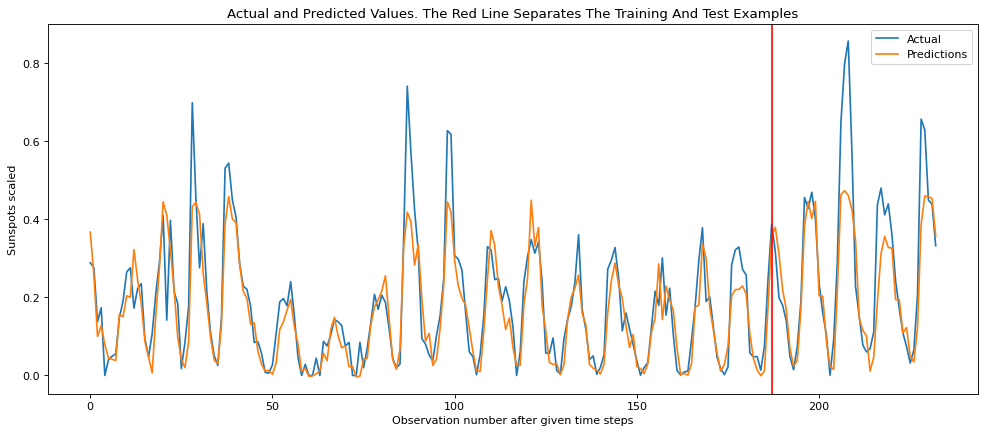

In [ ]:

# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1))
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

#Plot result
plot_result(trainY, testY, train_predict, test_predict)

## Airline passengers data

In [ ]:
# https://www.kaggle.com/andreazzini/international-airline-passengers

# Regression problem - Given the number of passengers (in units of thousands)
# this month, what is the number of passengers next month?

# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

numpy.random.seed(7)

dataframe = pandas.read_csv( 'international-airline-passengers.csv' ,
                            usecols=[1],engine= 'python' , skipfooter=3)
dataset = dataframe.values
# floating point values are more suitable for modeling with a neural networks
dataset = dataset.astype( 'float32' )

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# convert an array of values into a dataset matrix
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)-2):
        a = dataset[i:i+1, 0]
        dataX.append(a)
        dataY.append(dataset[i + 1, 0])
    return numpy.array(dataX), numpy.array(dataY)

trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

print(testX[:5])
print(testY[:5])
# observe the shape X=t and Y=t+1
print(testX.shape)

[[0.4073359 ]
 [0.3803089 ]
 [0.48648646]
 [0.47104248]
 [0.484556  ]]
[0.3803089  0.48648646 0.47104248 0.484556   0.6138996 ]
(45, 1)


In [ ]:
# reshape input to be [samples, time steps, features] as LSTM needs it

trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(testX.shape)

# create and fit the LSTM network
model = Sequential()
# units = the number of neurons/nodes in that layer
# input_dim = the dimensions of your features
model.add(LSTM(units=4, input_shape=(trainX.shape[1], 1)))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print( 'Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( 'Test Score: %.2f RMSE' % (testScore))

(45, 1, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
93/93 - 3s - 31ms/step - loss: 0.0367
Epoch 2/100
93/93 - 0s - 3ms/step - loss: 0.0167
Epoch 3/100
93/93 - 1s - 8ms/step - loss: 0.0128
Epoch 4/100
93/93 - 1s - 6ms/step - loss: 0.0119
Epoch 5/100
93/93 - 0s - 5ms/step - loss: 0.0108
Epoch 6/100
93/93 - 0s - 3ms/step - loss: 0.0099
Epoch 7/100
93/93 - 0s - 2ms/step - loss: 0.0090
Epoch 8/100
93/93 - 0s - 3ms/step - loss: 0.0081
Epoch 9/100
93/93 - 0s - 2ms/step - loss: 0.0074
Epoch 10/100
93/93 - 0s - 3ms/step - loss: 0.0064
Epoch 11/100
93/93 - 0s - 3ms/step - loss: 0.0057
Epoch 12/100
93/93 - 0s - 3ms/step - loss: 0.0050
Epoch 13/100
93/93 - 0s - 3ms/step - loss: 0.0044
Epoch 14/100
93/93 - 0s - 3ms/step - loss: 0.0038
Epoch 15/100
93/93 - 0s - 2ms/step - loss: 0.0033
Epoch 16/100
93/93 - 0s - 2ms/step - loss: 0.0030
Epoch 17/100
93/93 - 0s - 2ms/step - loss: 0.0027
Epoch 18/100
93/93 - 0s - 3ms/step - loss: 0.0025
Epoch 19/100
93/93 - 0s - 4ms/step - loss: 0.0024
Epoch 20/100
93/93 - 0s - 3ms/step - loss: 0.0022
Epoch 21

(93, 1)
(45, 1)


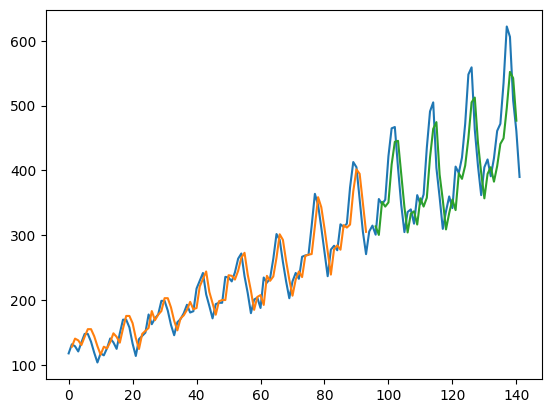

In [ ]:
print(trainPredict.shape)
print(testPredict.shape)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+3:len(dataset)-1, :] = testPredict

# plot baseline and predictions
# comment each of the lines below and observe
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()